<a href="https://colab.research.google.com/github/Cullen-hub/DataScience_Python_Course/blob/main/Copy_of_Econ_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshatsharma2/global-jobs-gdp-and-unemployment-data-19912022")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'global-jobs-gdp-and-unemployment-data-19912022' dataset.
Path to dataset files: /kaggle/input/global-jobs-gdp-and-unemployment-data-19912022


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(path + '/Employment_Unemployment_GDP_data.csv')


Data Cleaning Checks

In [40]:
df.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


In [41]:
df.describe()

,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
count,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5.751000e+03
mean,2006.568945,28.857051,19.773784,51.369166,8.155004,3.099333e+11
std,9.175548,24.026669,8.606954,18.892155,6.147428,1.375556e+12
min,1991.000000,0.107774,2.060372,5.314014,0.100000,7.228540e+07
25%,1999.000000,7.173214,13.889285,36.846735,3.659000,5.098458e+09
50%,2007.000000,22.172104,20.105516,52.657618,6.358000,1.972356e+10
75%,2014.000000,46.130703,25.345213,66.602313,10.996000,1.277237e+11
max,2022.000000,92.482036,59.579079,93.416932,38.800000,2.600689e+13


In [42]:
df.isnull().sum()

,0
Country Name,0
Year,0
Employment Sector: Agriculture,0
Employment Sector: Industry,0
Employment Sector: Services,0
Unemployment Rate,0
GDP (in USD),0


In [43]:
df.apply(lambda x: x.dtype)

,0
Country Name,object
Year,int64
Employment Sector: Agriculture,float64
Employment Sector: Industry,float64
Employment Sector: Services,float64
Unemployment Rate,float64
GDP (in USD),float64


In [44]:
df2 = df['Country Name'].apply(lambda x: type(x)).groupby(df['Country Name'].apply(lambda x: type(x))).groups
print(df2)
len(df2[str])

{<class 'str'>: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}


5751

In [45]:
df3 = df.apply(lambda x: x.unique())

In [46]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz



In [47]:
df3['Country Name']

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR, China', 'Hungary',
       'Iceland', 

In [48]:
ratio_df = pd.DataFrame(columns = df3['Country Name'].tolist(), index = df3['Country Name'].tolist())
for i in df3['Country Name']:
  for j in df3['Country Name']:
    ratio = fuzz.ratio(i,j)
    ratio_df.loc[i,j] = ratio if ratio > 80 and ratio != 100 else 0
ratio_df.head()

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,...,Estonia,West Bank and Gaza,Latvia,Lithuania,Serbia,Montenegro,Afghanistan,Guam,Virgin Islands (U.S.),South Sudan
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
for i in ratio_df:
  if (ratio_df[i] != 0).any():
    print(i)
    print(ratio_df[i][ratio_df[i] != 0])
    print("---")


Australia
Austria    88
Name: Australia, dtype: object
---
Austria
Australia    88
Name: Austria, dtype: object
---
Congo, Dem. Rep.
Congo, Rep.    81
Name: Congo, Dem. Rep., dtype: object
---
Congo, Rep.
Congo, Dem. Rep.    81
Name: Congo, Rep., dtype: object
---
Iceland
Ireland    86
Name: Iceland, dtype: object
---
Ireland
Iceland    86
Name: Ireland, dtype: object
---
Niger
Nigeria    83
Name: Niger, dtype: object
---
Nigeria
Niger    83
Name: Nigeria, dtype: object
---


#No duplicate or misspelt column names

In [50]:
df.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


In [75]:
df.columns

Index(['Country Name', 'Year', 'Employment Sector: Agriculture',
       'Employment Sector: Industry', 'Employment Sector: Services',
       'Unemployment Rate', 'GDP (in USD)'],
      dtype='object')

In [69]:
df_copy = df.copy()
df_copy.head()

,Country Name,Year,Employment Sector: Agriculture,Employment Sector: Industry,Employment Sector: Services,Unemployment Rate,GDP (in USD)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


In [76]:
mapping = {'Country Name' : 'Country_Name', 'Unemployment Rate': 'Unemployment_Rate', 'GDP (in USD)': 'GDP($)'}
df_copy.columns = df_copy.columns.str.replace('Employment Sector:', '')
df_copy.rename(columns = mapping, inplace = True)
df_copy.head()



,Country_Name,Year,Agriculture,Industry,Services,Unemployment_Rate,GDP($)
0,Albania,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,Algeria,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,Angola,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,Argentina,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,Armenia,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


In [81]:
df_numerical = df_copy.select_dtypes(include = np.number)
df_numerical.head()

,Year,Agriculture,Industry,Services,Unemployment_Rate,GDP($)
0,1991,53.299533,12.172764,34.527781,10.304,1.099559e+09
1,1991,24.118566,25.067734,50.813700,20.600,4.571568e+10
2,1991,40.071857,8.163345,51.764822,16.855,1.060378e+10
3,1991,13.669999,28.505903,57.824098,5.440,1.897200e+11
4,1991,54.263252,15.790454,29.946294,1.783,2.069870e+09


In [86]:
df_numerical.corr()

,Year,Agriculture,Industry,Services,Unemployment_Rate,GDP($)
Year,1.000000,-0.163934,-0.013050,0.214434,-0.030717,0.093942
Agriculture,-0.163934,1.000000,-0.711925,-0.947439,-0.223988,-0.173727
Industry,-0.013050,-0.711925,1.000000,0.449828,0.165182,0.116526
Services,0.214434,-0.947439,0.449828,1.000000,0.209609,0.167855
Unemployment_Rate,-0.030717,-0.223988,0.165182,0.209609,1.000000,-0.065154
GDP($),0.093942,-0.173727,0.116526,0.167855,-0.065154,1.000000


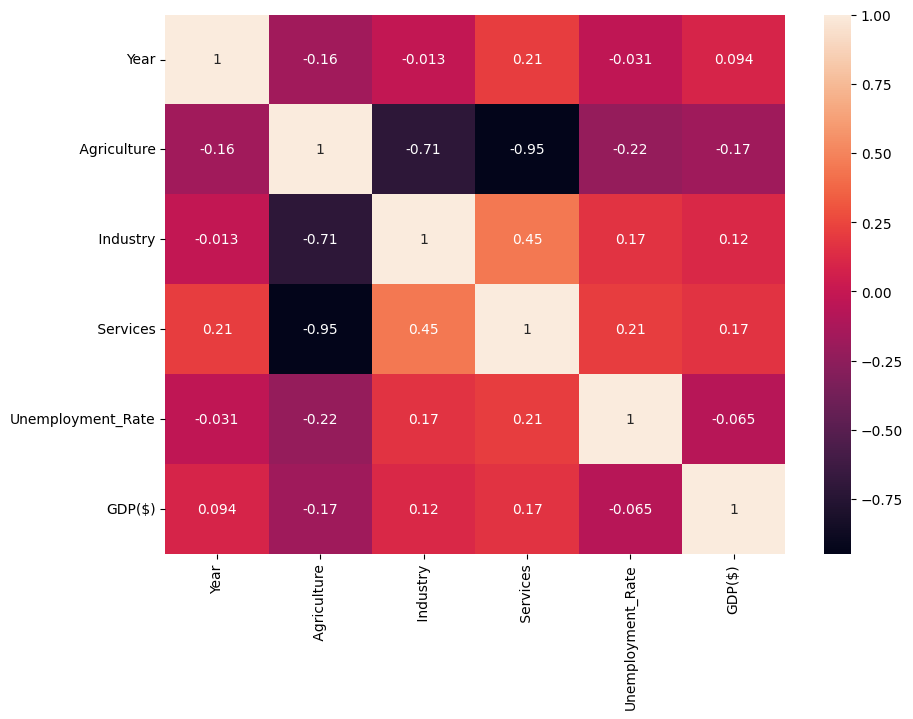

In [92]:
ax = sns.heatmap(df_numerical.corr(), annot = True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()